<a href="https://colab.research.google.com/github/jmaritar/neural-network/blob/master/src/02_saludable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Platillos Saludables

Para determinar si un platillo es saludable o no, se tienen como entradas la cantidad de gramos de grasas, la cantidad de gramos de carbohidratos y la cantidad de gramos de proteínas. Si queremos agregar más variables como la cantidad de fibra, la cantidad de calorías, la cantidad de sodio, entre otros, necesitaremos de más neuronas de entrada para poder procesar toda esta información y así determinar con mayor precisión si el platillo es saludable o no.

## Capas de la Red Neuronal

1. **Capa de entrada:** Un vector de 3 elementos representando los nutrientes básicos.
    - X1 = Grasas
    - X2 = Carbohidratos
    - X3 = Proteínas

2. **Capa oculta:** 3 neuronas representando nutrientes adicionales.
    - Y1 = Fibra
    - Y2 = Calorías
    - Y3 = Sodio

3. **Capa de salida:** 2 neuronas representando la clasificación del platillo.
    - P1 = No Saludable
    - P2 = Saludable

## Conexiones de la Red Neuronal

Las conexiones entre las capas se representan mediante matrices de pesos.

### De la capa de entrada a la capa oculta

$$
\begin{bmatrix}
0.6 & 0.4 & 0.3 \\
0.5 & 0.3 & 0.2 \\
0.4 & 0.2 & 0.1 \\
\end{bmatrix}
$$

### De la capa oculta a la capa de salida

$$
\begin{bmatrix}
0.2 & 0.2 \\
0.2 & 0.2 \\
0.2 & 0.2 \\
\end{bmatrix}
$$

## Calculando los Pesos

Para determinar si un platillo es saludable:
- Grasas (X1) = 20g
- Carbohidratos (X2) = 50g
- Proteínas (X3) = 30g
- Fibra (Y1) = 10g
- Calorías (Y2) = 200
- Sodio (Y3) = 5g

### Umbrales para la Clasificación

Para que un platillo sea considerado saludable, los nutrientes deben estar dentro de los siguientes rangos:

- Grasas: 10g - 30g
- Carbohidratos: 40g - 70g
- Proteínas: 20g - 40g
- Fibra: 5g - 15g
- Calorías: 150 - 300
- Sodio: 2g - 10g

- **No Saludable:** Cualquier nutriente fuera de estos rangos.
- **Saludable:** Todos los nutrientes dentro de estos rangos.

FloatSlider(value=20.0, description='Grasas (g)', step=1.0)

FloatSlider(value=50.0, description='Carbohidratos (g)', step=1.0)

FloatSlider(value=30.0, description='Proteínas (g)', step=1.0)

FloatSlider(value=10.0, description='Fibra (g)', step=1.0)

FloatSlider(value=200.0, description='Calorías', max=1000.0, step=10.0)

FloatSlider(value=100.0, description='Sodio (g)', step=1.0)

Button(description='Clasificar Platillo', style=ButtonStyle())

Valores: Grasas=49.0, Carbohidratos=50.0, Proteínas=30.0
Fibra=10.0, Calorías=200.0, Sodio=100.0
Valor entrada=49.0, Valor oculto=62.0, Resultado=111.0
El tipo de platillo es: No Saludable


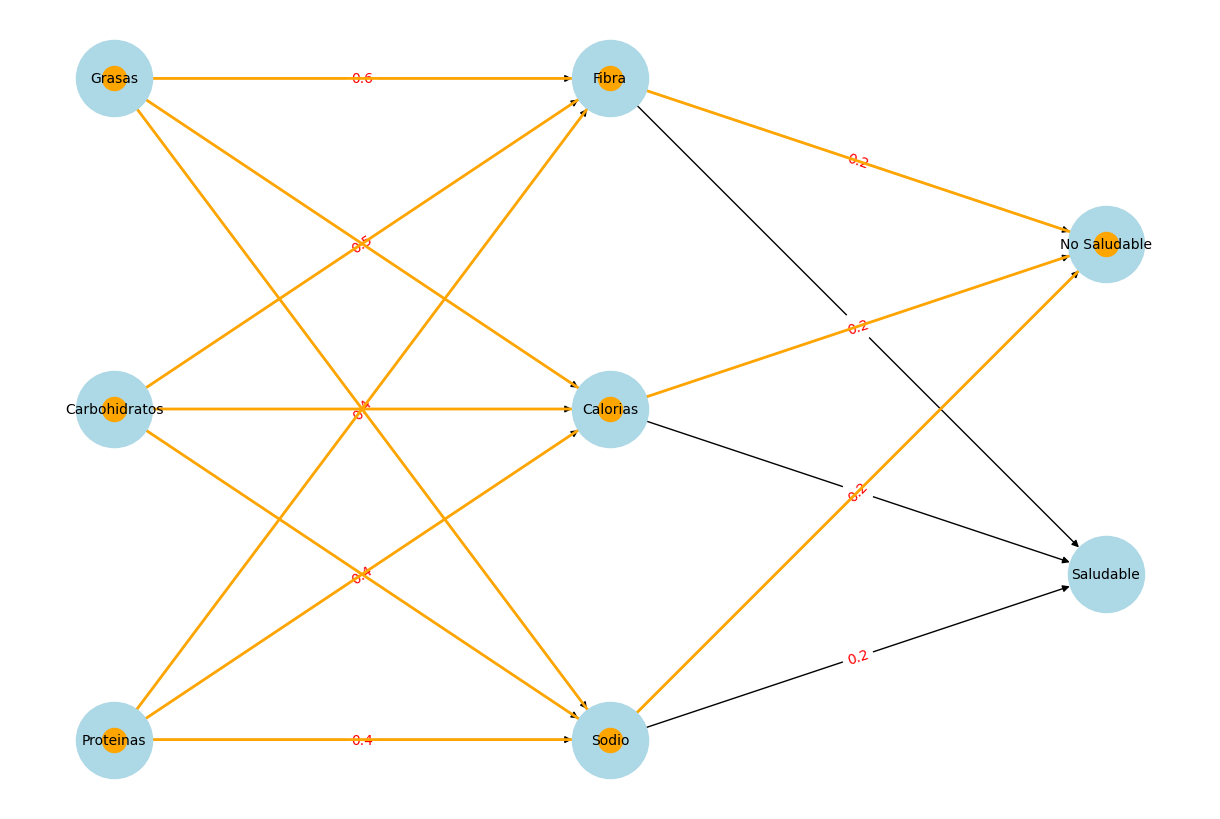

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, clear_output
import ipywidgets as widgets

# Pesos de los nutrientes
pesos_entrada = np.array([0.6, 0.5, 0.4])
pesos_ocultos = np.array([0.2, 0.2, 0.2])

# Rango ideal para los nutrientes
rango_ideal = {
    "grasas": (10, 30),
    "carbohidratos": (40, 70),
    "proteinas": (20, 40),
    "fibra": (5, 15),
    "calorias": (150, 300),
    "sodio": (2, 10)
}

# Función para calcular el resultado de la red neuronal
def calcular_resultado(nutrientes_base, nutrientes_adicionales):
    x = np.array([nutrientes_base['grasas'], nutrientes_base['carbohidratos'], nutrientes_base['proteinas']])
    y = np.array([nutrientes_adicionales['fibra'], nutrientes_adicionales['calorias'], nutrientes_adicionales['sodio']])
    valor_entrada = np.dot(pesos_entrada, x)
    valor_oculto = np.dot(pesos_ocultos, y)
    resultado = valor_entrada + valor_oculto
    print(f"Valores: Grasas={valor_entrada}, Carbohidratos={nutrientes_base['carbohidratos']}, Proteínas={nutrientes_base['proteinas']}")
    print(f"Fibra={nutrientes_adicionales['fibra']}, Calorías={nutrientes_adicionales['calorias']}, Sodio={nutrientes_adicionales['sodio']}")
    print(f"Valor entrada={valor_entrada}, Valor oculto={valor_oculto}, Resultado={resultado}")
    return resultado

# Función para determinar si el platillo es saludable
def clasificacion_platillo(nutrientes_base, nutrientes_adicionales):
    for nutriente, (min_val, max_val) in rango_ideal.items():
        valor = nutrientes_base.get(nutriente, nutrientes_adicionales.get(nutriente))
        if valor < min_val or valor > max_val:
            return "No Saludable"
    return "Saludable"

# Función para visualizar la red neuronal
def visualizar_red(nutrientes_base, nutrientes_adicionales):
    G = nx.DiGraph()
    edges = [
        ('Grasas', 'Fibra', pesos_entrada[0]), ('Grasas', 'Calorias', pesos_entrada[0]), ('Grasas', 'Sodio', pesos_entrada[0]),
        ('Carbohidratos', 'Fibra', pesos_entrada[1]), ('Carbohidratos', 'Calorias', pesos_entrada[1]), ('Carbohidratos', 'Sodio', pesos_entrada[1]),
        ('Proteinas', 'Fibra', pesos_entrada[2]), ('Proteinas', 'Calorias', pesos_entrada[2]), ('Proteinas', 'Sodio', pesos_entrada[2]),
        ('Fibra', 'No Saludable', pesos_ocultos[0]), ('Fibra', 'Saludable', pesos_ocultos[0]),
        ('Calorias', 'No Saludable', pesos_ocultos[1]), ('Calorias', 'Saludable', pesos_ocultos[1]),
        ('Sodio', 'No Saludable', pesos_ocultos[2]), ('Sodio', 'Saludable', pesos_ocultos[2])
    ]
    G.add_weighted_edges_from(edges)
    pos = {
        'Grasas': (0, 2), 'Carbohidratos': (0, 1), 'Proteinas': (0, 0),
        'Fibra': (1, 2), 'Calorias': (1, 1), 'Sodio': (1, 0),
        'No Saludable': (2, 1.5), 'Saludable': (2, 0.5)
    }

    # Determinar los nodos activados
    activaciones = ['Grasas' if nutrientes_base['grasas'] > 0 else None,
                    'Carbohidratos' if nutrientes_base['carbohidratos'] > 0 else None,
                    'Proteinas' if nutrientes_base['proteinas'] > 0 else None]
    activaciones += [nut.capitalize() for nut, val in nutrientes_adicionales.items() if val > 0]
    activaciones = list(filter(None, activaciones))

    tipo_platillo = clasificacion_platillo(nutrientes_base, nutrientes_adicionales)
    if tipo_platillo != "Clasificación no válida":
        activaciones.append(tipo_platillo)

    # Dibujar la red neuronal
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, arrows=True)
    edge_labels = {(u, v): f'{d["weight"]:.1f}' for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    # Resaltar nodos y conexiones activadas
    activated_edges = [(u, v) for u, v, d in G.edges(data=True) if u in activaciones and v in activaciones]
    nx.draw_networkx_edges(G, pos, edgelist=activated_edges, edge_color='orange', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=activaciones, node_color='orange')

    plt.show()

# Interfaz de usuario para cambiar los valores
grasas_slider = widgets.FloatSlider(value=20, min=0, max=100, step=1, description='Grasas (g)')
carbohidratos_slider = widgets.FloatSlider(value=50, min=0, max=100, step=1, description='Carbohidratos (g)')
proteinas_slider = widgets.FloatSlider(value=30, min=0, max=100, step=1, description='Proteínas (g)')
fibra_slider = widgets.FloatSlider(value=10, min=0, max=100, step=1, description='Fibra (g)')
calorias_slider = widgets.FloatSlider(value=200, min=0, max=1000, step=10, description='Calorías')
sodio_slider = widgets.FloatSlider(value=5, min=0, max=100, step=1, description='Sodio (g)')
button = widgets.Button(description='Clasificar Platillo')

# Función de manejo del botón
def on_button_clicked(b):
    clear_output(wait=True)
    display(grasas_slider, carbohidratos_slider, proteinas_slider, fibra_slider, calorias_slider, sodio_slider, button)
    nutrientes_base = {
        "grasas": grasas_slider.value,
        "carbohidratos": carbohidratos_slider.value,
        "proteinas": proteinas_slider.value
    }
    nutrientes_adicionales = {
        "fibra": fibra_slider.value,
        "calorias": calorias_slider.value,
        "sodio": sodio_slider.value
    }
    resultado = calcular_resultado(nutrientes_base, nutrientes_adicionales)
    tipo_platillo = clasificacion_platillo(nutrientes_base, nutrientes_adicionales)
    print(f"El tipo de platillo es: {tipo_platillo}")
    visualizar_red(nutrientes_base, nutrientes_adicionales)

button.on_click(on_button_clicked)

# Mostrar la interfaz
display(grasas_slider, carbohidratos_slider, proteinas_slider, fibra_slider, calorias_slider, sodio_slider, button)